In [76]:
!pip install scikit-learn

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [78]:
df=pd.read_csv('spam.csv', sep='\t')

In [79]:
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [80]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [81]:
len(df)

5572

In [82]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [83]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

#  Balance this data

In [84]:
ham=df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [85]:
spam=df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [86]:
ham.shape,spam.shape

((4825, 4), (747, 4))

In [87]:
ham=ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [88]:
ham.shape,spam.shape

((747, 4), (747, 4))

In [89]:
data=ham.append(spam,ignore_index=True)
data

,label,message,length,punct
0,ham,what number do u live at? Is it 11?,36,2
1,ham,Thanx 4 e brownie it's v nice...,32,4
2,ham,Wylie update: my weed dealer carlos went to fr...,81,1
3,ham,U still going to the mall?,26,1
4,ham,Nope i'm not drivin... I neva develop da photo...,54,7
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


#  Exploratory Data Analysis

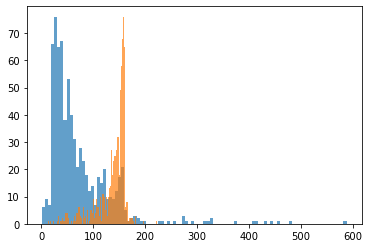

In [90]:
plt.hist(data[data['label']=='ham']['length'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['length'],bins=100,alpha=0.7)
plt.show()

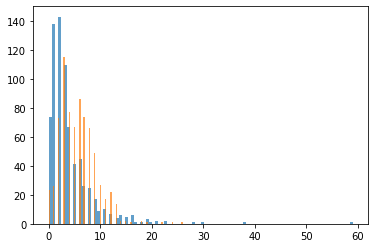

In [91]:
plt.hist(data[data['label']=='ham']['punct'],bins=100,alpha=0.7)
plt.hist(data[data['label']=='spam']['punct'],bins=100,alpha=0.7)
plt.show()

# Data Preparation

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [93]:
x_train,x_test,y_train,y_test=train_test_split(data['message'],data['label'],test_size=0.3,shuffle=True,stratify=data['label'])

In [94]:
x_train.shape

(1045,)

In [95]:
y_train

1175    spam
220      ham
1038    spam
1435    spam
943     spam
        ... 
217      ham
614      ham
1440    spam
521      ham
757     spam
Name: label, Length: 1045, dtype: object

# Bag of words Creation 

In [96]:
vectorizer=TfidfVectorizer()

In [97]:
X_train=vectorizer.fit_transform(x_train)

In [98]:
x_train.shape

(1045,)

In [99]:
3900*7174

27978600

In [100]:
x_train

1175    Dear Voucher Holder, To claim this weeks offer...
220     Great. I was getting worried about you. Just k...
1038    Final Chance! Claim ur £150 worth of discount ...
1435    Do you want a New Nokia 3510i colour phone Del...
943     FREE2DAY sexy St George's Day pic of Jordan!Tx...
                              ...                        
217     Rose for red,red for blood,blood for heart,hea...
614                 Blank is Blank. But wat is blank? Lol
1440    Get 3 Lions England tone, reply lionm 4 mono o...
521     New car and house for my parents.:)i have only...
757     SMS. ac Sptv: The New Jersey Devils and the De...
Name: message, Length: 1045, dtype: object

#  Pipeline and RF

In [101]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',RandomForestClassifier(n_estimators=100,n_jobs=-1))])

In [102]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier(n_jobs=-1))])

In [103]:
y_pred=clf.predict(x_test)

In [104]:
confusion_matrix(y_test,y_pred)

array([[223,   2],
       [ 22, 202]], dtype=int64)

In [107]:
accuracy_score(y_test,y_pred)

0.9465478841870824

In [108]:
clf.predict(["Hy, whatsup"])

array(['ham'], dtype=object)

In [109]:
clf.predict(["Lottery won of $100000"])

array(['ham'], dtype=object)

In [110]:
from sklearn.svm import SVC

In [113]:
clf=Pipeline([('tfidf',TfidfVectorizer()),('clf',SVC(C=1, gamma='auto'))])

In [114]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', SVC(C=1, gamma='auto'))])

In [115]:
y_pred=clf.predict(x_test)

In [116]:
confusion_matrix(y_test,y_pred)

array([[  0, 225],
       [  0, 224]], dtype=int64)

In [117]:
accuracy_score(y_test,y_pred)

0.49888641425389757